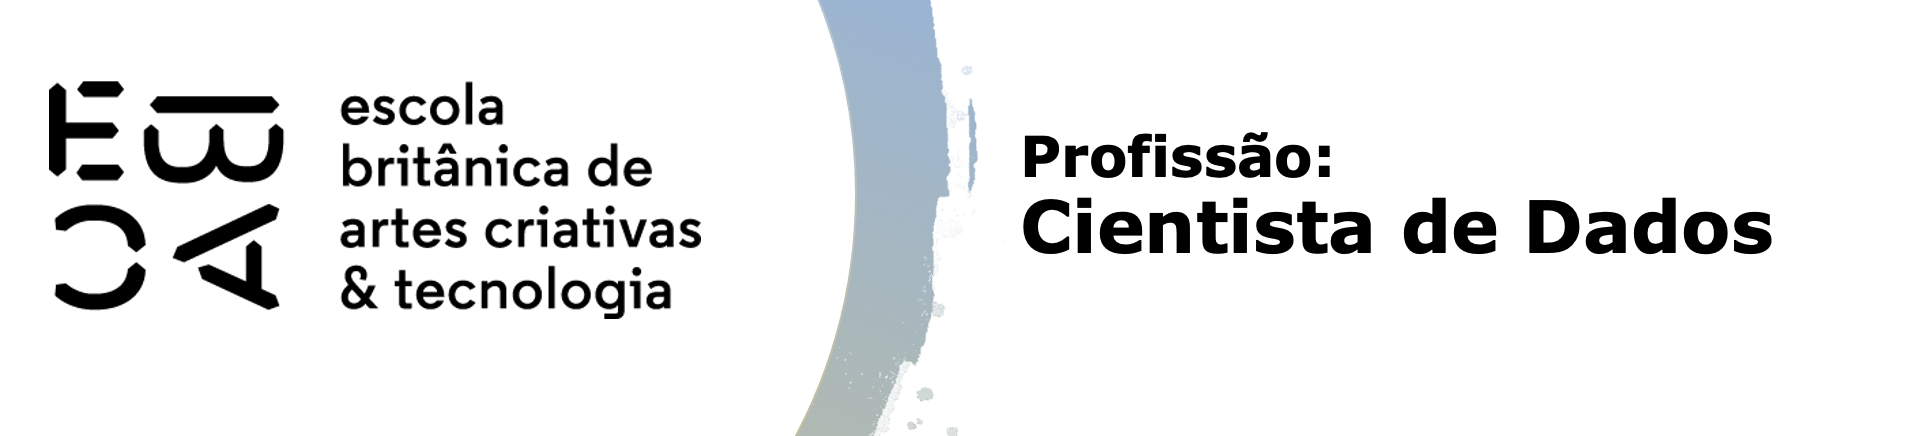

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('./input/X_train.csv')
X_train.head(3)

,Order,Subject,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
0,1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [3]:
X_test = pd.read_csv('./input/X_test.csv')
X_test.head(3)

,Order,Subject,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
0,1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346


In [4]:
y_train = pd.read_csv('./input/y_train.txt', header=None)
y_train.head(3)

,0
0,5
1,5
2,5


In [5]:
y_test = pd.read_csv('./input/y_test.txt', header=None)
y_test.head(3)

,0
0,5
1,5
2,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
# Como já sabemos quais são as variáveis, não é necessário fazer o código de novo. Vamos salvá-las diretamente em uma variável separada.
colunas = ["('tGravityAcc-mean()-X',)", "('fBodyAcc-mean()-X',)", "('angle(Y,gravityMean)',)"]
X_train_top3 = X_train[colunas]
X_test_top3 = X_test[colunas]

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X_train_top3, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 15.6 ms
Wall time: 26.9 ms


In [8]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [9]:
ccp_alphas

array([0.00000000e+00, 5.44995104e-06, 6.59151729e-06, 7.01879270e-06,
       1.00688213e-05, 1.03242131e-05, 1.13157341e-05, 1.16014850e-05,
       1.20819934e-05, 1.71709922e-05, 2.04026115e-05, 2.18260495e-05,
       2.24204522e-05, 3.49759055e-05, 3.50019444e-05, 3.84049158e-05,
       3.90792056e-05, 4.01136091e-05, 4.76060936e-05, 4.85876625e-05,
       6.11350980e-05, 6.41224934e-05, 6.43815742e-05, 7.09154651e-05,
       7.76436703e-05, 8.49884806e-05, 9.12180251e-05, 9.59158433e-05,
       9.65080080e-05, 9.69088102e-05, 9.95342357e-05, 1.01346036e-04,
       1.01996980e-04, 1.04033577e-04, 1.16715400e-04, 1.25847466e-04,
       1.54976359e-04, 1.69243452e-04, 1.84844173e-04, 1.91557853e-04,
       2.11582638e-04, 2.12090764e-04, 2.16923939e-04, 2.19877768e-04,
       2.20866366e-04, 2.21614574e-04, 2.23514503e-04, 2.32384455e-04,
       2.32854113e-04, 2.34521016e-04, 2.34706577e-04, 2.38283524e-04,
       2.41444531e-04, 2.73146473e-04, 2.74554425e-04, 2.74993939e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [10]:
%%time
clf = DecisionTreeClassifier(random_state=2360873)
clf

CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(random_state=2360873)

In [11]:
%%time
grid_parametros = {'ccp_alpha': ccp_alphas[::10]}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 2.04026115e-05, 6.11350980e-05, 9.95342357e-05,
        2.11582638e-04, 2.34706577e-04, 3.56536458e-04, 6.36021804e-04,
        9.47195622e-04, 1.72991926e-03, 2.42772323e-03, 3.40610275e-02])}

In [12]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_top3, y_train) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START ccp_alpha=0.0.............................................
[CV 1/10; 1/12] END ..............ccp_alpha=0.0;, score=0.753 total time=   0.0s
[CV 2/10; 1/12] START ccp_alpha=0.0.............................................
[CV 2/10; 1/12] END ..............ccp_alpha=0.0;, score=0.768 total time=   0.0s
[CV 3/10; 1/12] START ccp_alpha=0.0.............................................
[CV 3/10; 1/12] END ..............ccp_alpha=0.0;, score=0.814 total time=   0.0s
[CV 4/10; 1/12] START ccp_alpha=0.0.............................................
[CV 4/10; 1/12] END ..............ccp_alpha=0.0;, score=0.661 total time=   0.0s
[CV 5/10; 1/12] START ccp_alpha=0.0.............................................
[CV 5/10; 1/12] END ..............ccp_alpha=0.0;, score=0.724 total time=   0.0s
[CV 6/10; 1/12] START ccp_alpha=0.0.............................................
[CV 6/10; 1/12] END ..............ccp_alpha=0.

[CV 10/10; 6/12] END ccp_alpha=0.0002347065765151827;, score=0.773 total time=   0.0s
[CV 1/10; 7/12] START ccp_alpha=0.00035653645792265223..........................
[CV 1/10; 7/12] END ccp_alpha=0.00035653645792265223;, score=0.757 total time=   0.0s
[CV 2/10; 7/12] START ccp_alpha=0.00035653645792265223..........................
[CV 2/10; 7/12] END ccp_alpha=0.00035653645792265223;, score=0.783 total time=   0.0s
[CV 3/10; 7/12] START ccp_alpha=0.00035653645792265223..........................
[CV 3/10; 7/12] END ccp_alpha=0.00035653645792265223;, score=0.819 total time=   0.0s
[CV 4/10; 7/12] START ccp_alpha=0.00035653645792265223..........................
[CV 4/10; 7/12] END ccp_alpha=0.00035653645792265223;, score=0.694 total time=   0.0s
[CV 5/10; 7/12] START ccp_alpha=0.00035653645792265223..........................
[CV 5/10; 7/12] END ccp_alpha=0.00035653645792265223;, score=0.766 total time=   0.0s
[CV 6/10; 7/12] START ccp_alpha=0.00035653645792265223.........................

[CV 4/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.770 total time=   0.0s
[CV 5/10; 12/12] START ccp_alpha=0.034061027514292325...........................
[CV 5/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.776 total time=   0.0s
[CV 6/10; 12/12] START ccp_alpha=0.034061027514292325...........................
[CV 6/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.834 total time=   0.0s
[CV 7/10; 12/12] START ccp_alpha=0.034061027514292325...........................
[CV 7/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.782 total time=   0.0s
[CV 8/10; 12/12] START ccp_alpha=0.034061027514292325...........................
[CV 8/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.751 total time=   0.0s
[CV 9/10; 12/12] START ccp_alpha=0.034061027514292325...........................
[CV 9/10; 12/12] END ccp_alpha=0.034061027514292325;, score=0.790 total time=   0.0s
[CV 10/10; 12/12] START ccp_alpha=0.034061027514292325..........................
[CV 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.04026115e-05, 6.11350980e-05, 9.95342357e-05,
       2.11582638e-04, 2.34706577e-04, 3.56536458e-04, 6.36021804e-04,
       9.47195622e-04, 1.72991926e-03, 2.42772323e-03, 3.40610275e-02])},
             verbose=100)

In [13]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.04026115e-05, 6.11350980e-05, 9.95342357e-05,
       2.11582638e-04, 2.34706577e-04, 3.56536458e-04, 6.36021804e-04,
       9.47195622e-04, 1.72991926e-03, 2.42772323e-03, 3.40610275e-02])},
             verbose=100)

In [14]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019852,0.001362,0.002492,0.000500,0.0,{'ccp_alpha': 0.0},0.752717,0.767663,0.813605,0.661224,0.723810,0.742857,0.776871,0.746939,0.817687,0.755102,0.755848,0.042403,9
1,0.018351,0.001015,0.002293,0.000639,0.00002,{'ccp_alpha': 2.0402611534276003e-05},0.752717,0.767663,0.813605,0.661224,0.723810,0.742857,0.776871,0.746939,0.817687,0.755102,0.755848,0.042403,9
2,0.018224,0.000905,0.002086,0.000300,0.000061,{'ccp_alpha': 6.113509801981983e-05},0.752717,0.767663,0.813605,0.661224,0.723810,0.742857,0.776871,0.746939,0.817687,0.755102,0.755848,0.042403,9
3,0.018445,0.001022,0.002400,0.000489,0.0001,{'ccp_alpha': 9.953423570927358e-05},0.752717,0.767663,0.813605,0.661224,0.723810,0.742857,0.776871,0.746939,0.817687,0.755102,0.755848,0.042403,9
4,0.018949,0.000892,0.002394,0.000489,0.000212,{'ccp_alpha': 0.00021158263813323688},0.744565,0.779891,0.813605,0.674830,0.738776,0.751020,0.793197,0.757823,0.825850,0.772789,0.765235,0.040774,8
5,0.018949,0.001180,0.002593,0.000488,0.000235,{'ccp_alpha': 0.0002347065765151827},0.752717,0.777174,0.810884,0.672109,0.771429,0.751020,0.786395,0.760544,0.843537,0.772789,0.769860,0.042119,7
6,0.020044,0.000939,0.002495,0.000500,0.000357,{'ccp_alpha': 0.00035653645792265223},0.756793,0.782609,0.819048,0.693878,0.765986,0.772789,0.804082,0.780952,0.847619,0.771429,0.779518,0.038678,4
7,0.017952,0.000631,0.002194,0.000399,0.000636,{'ccp_alpha': 0.0006360218037312708},0.733696,0.755435,0.846259,0.714286,0.749660,0.767347,0.810884,0.757823,0.865306,0.764626,0.776532,0.046234,5
8,0.018051,0.000829,0.002494,0.000499,0.000947,{'ccp_alpha': 0.0009471956215572399},0.798913,0.759511,0.832653,0.721088,0.801361,0.760544,0.834014,0.696599,0.869388,0.756463,0.783053,0.051166,3
9,0.017952,0.001093,0.002194,0.000399,0.00173,{'ccp_alpha': 0.0017299192567476335},0.816576,0.786685,0.813605,0.734694,0.725170,0.776871,0.854422,0.726531,0.868027,0.729252,0.783183,0.051187,2


In [15]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0024277232304312606, random_state=2360873)

In [16]:
grid.best_index_

10

In [17]:
grid.best_score_

0.7876663708961845

In [18]:
resultados
resultados.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,0.017952,0.000631,0.002194,0.000399,0.000636,{'ccp_alpha': 0.0006360218037312708},0.733696,0.755435,0.846259,0.714286,0.749660,0.767347,0.810884,0.757823,0.865306,0.764626,0.776532,0.046234,5
8,0.018051,0.000829,0.002494,0.000499,0.000947,{'ccp_alpha': 0.0009471956215572399},0.798913,0.759511,0.832653,0.721088,0.801361,0.760544,0.834014,0.696599,0.869388,0.756463,0.783053,0.051166,3
9,0.017952,0.001093,0.002194,0.000399,0.00173,{'ccp_alpha': 0.0017299192567476335},0.816576,0.786685,0.813605,0.734694,0.725170,0.776871,0.854422,0.726531,0.868027,0.729252,0.783183,0.051187,2
10,0.017952,0.000631,0.002294,0.000457,0.002428,{'ccp_alpha': 0.0024277232304312606},0.820652,0.831522,0.827211,0.734694,0.726531,0.787755,0.840816,0.717007,0.873469,0.717007,0.787666,0.055939,1
11,0.018051,0.000537,0.002194,0.000399,0.034061,{'ccp_alpha': 0.034061027514292325},0.756793,0.773098,0.804082,0.770068,0.775510,0.834014,0.782313,0.751020,0.790476,0.703401,0.774078,0.032671,6


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [19]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.0024277232304312606

In [20]:
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_top3, y_train)

In [21]:
# Acurácia dessa árvore na base de treino
clf.score(X_train_top3, y_train)

0.8563656147986942

In [22]:
# Acurácia dessa árvore na base de testes
acuracia_teste = clf.score(X_test_top3, y_test)
acuracia_teste

0.7132677298948082

Acurácia da melhor árvore na base de testes: 71.33


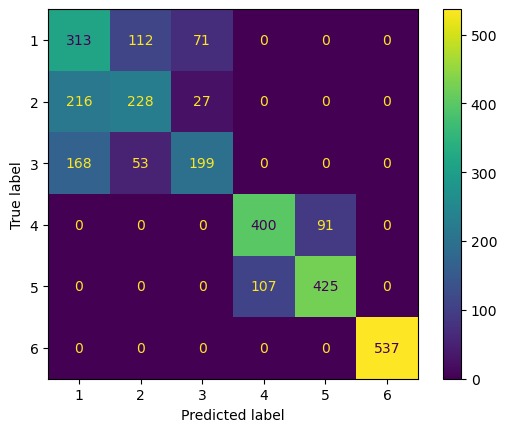

In [23]:
# Matriz de confusão da base de testes
print(f'Acurácia da melhor árvore na base de testes: {acuracia_teste*100:.2f}')

ConfusionMatrixDisplay.from_estimator(clf, X_test_top3, y_test)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [24]:
# Calculando acertos e erros por classe
y_pred = clf.predict(X_test_top3)
cm = confusion_matrix(y_test, y_pred)
acertos = cm.diagonal()
erros = cm.sum(axis=0) - acertos
total = acertos + erros

avaliação = pd.DataFrame({
    'Classe': range(1, len(acertos) + 1),
    'Acertos': acertos, 
    'Erros': erros, 
    'Total' : total, 
    '%' : (acertos / (total)) * 100
})

avaliação['%'] = avaliação['%'].round(2)
avaliação.set_index('Classe', inplace=True)
avaliação

,Acertos,Erros,Total,%
Classe,,,,
1,313,384,697,44.91
2,228,165,393,58.02
3,199,98,297,67.00
4,400,107,507,78.90
5,425,91,516,82.36
6,537,0,537,100.00


In [25]:
y_train_2 = (y_train == 1).astype(int)

In [26]:
árvore_2 = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_2)

In [27]:
importancias = árvore_2.feature_importances_
indices_importantes = np.argsort(importancias)[::-1][:3]
print('As 3 variáveis com maior importância: ')
for indice in indices_importantes:
    nome_variavel = X_train.columns[indice]
    print(f" {indice} - {nome_variavel} : {importancias[indice]:.4f}")

As 3 variáveis com maior importância: 
 505 - ('fBodyAccMag-std()',) : 0.3524
 168 - ('tBodyGyroJerk-mad()-X',) : 0.3522
 67 - ('tGravityAcc-arCoeff()-X,1',) : 0.1130


In [28]:
X_train_top3_2 = X_train.iloc[:, indices_importantes]
X_train_top3_2.head(3)

,"('fBodyAccMag-std()',)","('tBodyGyroJerk-mad()-X',)","('tGravityAcc-arCoeff()-X,1',)"
0,-0.956134,-0.992165,-0.590425
1,-0.975866,-0.989876,-0.410056
2,-0.989015,-0.987868,0.002234


In [29]:
X_test_top3_2 = X_test.iloc[:, indices_importantes]
X_test_top3_2.head(3)

,"('fBodyAccMag-std()',)","('tBodyGyroJerk-mad()-X',)","('tGravityAcc-arCoeff()-X,1',)"
0,-0.711074,-0.910363,-0.430254
1,-0.959746,-0.968614,-0.509882
2,-0.983784,-0.983723,-0.294986


In [30]:
%%time
clf2 = DecisionTreeClassifier(random_state=2360873)
caminho2 = clf2.cost_complexity_pruning_path(X_train_top3_2, y_train)
ccp_alphas2, impurities2 = caminho2.ccp_alphas, caminho2.impurities

CPU times: total: 31.2 ms
Wall time: 34.9 ms


In [31]:
ccp_alphas2 = np.unique(ccp_alphas2[ccp_alphas2>=0])
ccp_alphas2

array([0.00000000e+00, 9.06782735e-05, 1.02013058e-04, 1.08813928e-04,
       1.13347842e-04, 1.13347842e-04, 1.13760016e-04, 1.14859146e-04,
       1.16586352e-04, 1.16586352e-04, 1.17014978e-04, 1.17348354e-04,
       1.17881756e-04, 1.19015234e-04, 1.19824861e-04, 1.19865343e-04,
       1.20904365e-04, 1.20904365e-04, 1.20904365e-04, 1.21444116e-04,
       1.21699788e-04, 1.22415669e-04, 1.22415669e-04, 1.22415669e-04,
       1.23063371e-04, 1.23265778e-04, 1.23652191e-04, 1.24189809e-04,
       1.24682626e-04, 1.24682626e-04, 1.25279194e-04, 1.25554533e-04,
       1.26301881e-04, 1.26661715e-04, 1.26949583e-04, 1.27185111e-04,
       1.27201467e-04, 1.27516322e-04, 1.28016386e-04, 1.28460887e-04,
       1.28661859e-04, 1.28665118e-04, 1.28858599e-04, 1.29216540e-04,
       1.29540391e-04, 1.29834801e-04, 1.30016642e-04, 1.30302585e-04,
       1.30350018e-04, 1.30979728e-04, 1.31159646e-04, 1.31272617e-04,
       1.31664853e-04, 1.32124656e-04, 1.32239149e-04, 1.32926105e-04,
      

In [32]:
clf2 = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4)
clf2

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=2360873)

In [33]:
grid_parametros_2 = {'ccp_alpha': ccp_alphas2[::10]}
grid_parametros_2

{'ccp_alpha': array([0.        , 0.00011701, 0.0001217 , 0.00012528, 0.00012866,
        0.00013116, 0.00013571, 0.00014088, 0.00014811, 0.00015919,
        0.00016322, 0.0001675 , 0.00017229, 0.00018067, 0.00018401,
        0.00018752, 0.00019158, 0.00019603, 0.00020079, 0.00020574,
        0.00020921, 0.00021308, 0.00021763, 0.00022216, 0.00022588,
        0.00022937, 0.0002336 , 0.00023892, 0.00024196, 0.00024483,
        0.0002498 , 0.00025602, 0.00026379, 0.00027158, 0.00027808,
        0.00029006, 0.00029604, 0.00030653, 0.00031889, 0.00032537,
        0.00034778, 0.00035947, 0.00037391, 0.00038347, 0.00040758,
        0.00044342, 0.0004967 , 0.00063442, 0.00078696, 0.00093579,
        0.00123201, 0.00263911, 0.01494133])}

In [34]:
%%time
grid2 = GridSearchCV(estimator = clf, param_grid=grid_parametros_2, cv=10, verbose=100)
grid2.fit(X_train_top3, y_train) 

Fitting 10 folds for each of 53 candidates, totalling 530 fits
[CV 1/10; 1/53] START ccp_alpha=0.0.............................................
[CV 1/10; 1/53] END ..............ccp_alpha=0.0;, score=0.753 total time=   0.0s
[CV 2/10; 1/53] START ccp_alpha=0.0.............................................
[CV 2/10; 1/53] END ..............ccp_alpha=0.0;, score=0.768 total time=   0.0s
[CV 3/10; 1/53] START ccp_alpha=0.0.............................................
[CV 3/10; 1/53] END ..............ccp_alpha=0.0;, score=0.814 total time=   0.0s
[CV 4/10; 1/53] START ccp_alpha=0.0.............................................
[CV 4/10; 1/53] END ..............ccp_alpha=0.0;, score=0.661 total time=   0.0s
[CV 5/10; 1/53] START ccp_alpha=0.0.............................................
[CV 5/10; 1/53] END ..............ccp_alpha=0.0;, score=0.724 total time=   0.0s
[CV 6/10; 1/53] START ccp_alpha=0.0.............................................
[CV 6/10; 1/53] END ..............ccp_alpha=0.

[CV 1/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.750 total time=   0.0s
[CV 2/10; 6/53] START ccp_alpha=0.00013115964557749104..........................
[CV 2/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.770 total time=   0.0s
[CV 3/10; 6/53] START ccp_alpha=0.00013115964557749104..........................
[CV 3/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.805 total time=   0.0s
[CV 4/10; 6/53] START ccp_alpha=0.00013115964557749104..........................
[CV 4/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.660 total time=   0.0s
[CV 5/10; 6/53] START ccp_alpha=0.00013115964557749104..........................
[CV 5/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.722 total time=   0.0s
[CV 6/10; 6/53] START ccp_alpha=0.00013115964557749104..........................
[CV 6/10; 6/53] END ccp_alpha=0.00013115964557749104;, score=0.743 total time=   0.0s
[CV 7/10; 6/53] START ccp_alpha=0.00013115964557749104.........................

[CV 1/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.746 total time=   0.0s
[CV 2/10; 11/53] START ccp_alpha=0.00016322089227421095.........................
[CV 2/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.781 total time=   0.0s
[CV 3/10; 11/53] START ccp_alpha=0.00016322089227421095.........................
[CV 3/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.811 total time=   0.0s
[CV 4/10; 11/53] START ccp_alpha=0.00016322089227421095.........................
[CV 4/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.664 total time=   0.0s
[CV 5/10; 11/53] START ccp_alpha=0.00016322089227421095.........................
[CV 5/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.733 total time=   0.0s
[CV 6/10; 11/53] START ccp_alpha=0.00016322089227421095.........................
[CV 6/10; 11/53] END ccp_alpha=0.00016322089227421095;, score=0.752 total time=   0.0s
[CV 7/10; 11/53] START ccp_alpha=0.00016322089227421095..................

[CV 4/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.668 total time=   0.0s
[CV 5/10; 16/53] START ccp_alpha=0.0001875240151878144..........................
[CV 5/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.740 total time=   0.0s
[CV 6/10; 16/53] START ccp_alpha=0.0001875240151878144..........................
[CV 6/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.752 total time=   0.0s
[CV 7/10; 16/53] START ccp_alpha=0.0001875240151878144..........................
[CV 7/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.773 total time=   0.0s
[CV 8/10; 16/53] START ccp_alpha=0.0001875240151878144..........................
[CV 8/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.759 total time=   0.0s
[CV 9/10; 16/53] START ccp_alpha=0.0001875240151878144..........................
[CV 9/10; 16/53] END ccp_alpha=0.0001875240151878144;, score=0.827 total time=   0.0s
[CV 10/10; 16/53] START ccp_alpha=0.0001875240151878144........................

[CV 7/10; 21/53] END ccp_alpha=0.00020920773097051664;, score=0.789 total time=   0.0s
[CV 8/10; 21/53] START ccp_alpha=0.00020920773097051664.........................
[CV 8/10; 21/53] END ccp_alpha=0.00020920773097051664;, score=0.758 total time=   0.0s
[CV 9/10; 21/53] START ccp_alpha=0.00020920773097051664.........................
[CV 9/10; 21/53] END ccp_alpha=0.00020920773097051664;, score=0.826 total time=   0.0s
[CV 10/10; 21/53] START ccp_alpha=0.00020920773097051664........................
[CV 10/10; 21/53] END ccp_alpha=0.00020920773097051664;, score=0.773 total time=   0.0s
[CV 1/10; 22/53] START ccp_alpha=0.00021308162227373802.........................
[CV 1/10; 22/53] END ccp_alpha=0.00021308162227373802;, score=0.745 total time=   0.0s
[CV 2/10; 22/53] START ccp_alpha=0.00021308162227373802.........................
[CV 2/10; 22/53] END ccp_alpha=0.00021308162227373802;, score=0.780 total time=   0.0s
[CV 3/10; 22/53] START ccp_alpha=0.00021308162227373802.................

[CV 8/10; 26/53] END ccp_alpha=0.00022937481452171339;, score=0.761 total time=   0.0s
[CV 9/10; 26/53] START ccp_alpha=0.00022937481452171339.........................
[CV 9/10; 26/53] END ccp_alpha=0.00022937481452171339;, score=0.842 total time=   0.0s
[CV 10/10; 26/53] START ccp_alpha=0.00022937481452171339........................
[CV 10/10; 26/53] END ccp_alpha=0.00022937481452171339;, score=0.773 total time=   0.0s
[CV 1/10; 27/53] START ccp_alpha=0.00023360450455118574.........................
[CV 1/10; 27/53] END ccp_alpha=0.00023360450455118574;, score=0.753 total time=   0.0s
[CV 2/10; 27/53] START ccp_alpha=0.00023360450455118574.........................
[CV 2/10; 27/53] END ccp_alpha=0.00023360450455118574;, score=0.777 total time=   0.0s
[CV 3/10; 27/53] START ccp_alpha=0.00023360450455118574.........................
[CV 3/10; 27/53] END ccp_alpha=0.00023360450455118574;, score=0.811 total time=   0.0s
[CV 4/10; 27/53] START ccp_alpha=0.00023360450455118574.................

[CV 1/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.751 total time=   0.0s
[CV 2/10; 32/53] START ccp_alpha=0.0002560196095229451..........................
[CV 2/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.773 total time=   0.0s
[CV 3/10; 32/53] START ccp_alpha=0.0002560196095229451..........................
[CV 3/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.808 total time=   0.0s
[CV 4/10; 32/53] START ccp_alpha=0.0002560196095229451..........................
[CV 4/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.672 total time=   0.0s
[CV 5/10; 32/53] START ccp_alpha=0.0002560196095229451..........................
[CV 5/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.770 total time=   0.0s
[CV 6/10; 32/53] START ccp_alpha=0.0002560196095229451..........................
[CV 6/10; 32/53] END ccp_alpha=0.0002560196095229451;, score=0.750 total time=   0.0s
[CV 7/10; 32/53] START ccp_alpha=0.0002560196095229451.........................

[CV 1/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.754 total time=   0.0s
[CV 2/10; 37/53] START ccp_alpha=0.0002960378928502853..........................
[CV 2/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.777 total time=   0.0s
[CV 3/10; 37/53] START ccp_alpha=0.0002960378928502853..........................
[CV 3/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.808 total time=   0.0s
[CV 4/10; 37/53] START ccp_alpha=0.0002960378928502853..........................
[CV 4/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.686 total time=   0.0s
[CV 5/10; 37/53] START ccp_alpha=0.0002960378928502853..........................
[CV 5/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.763 total time=   0.0s
[CV 6/10; 37/53] START ccp_alpha=0.0002960378928502853..........................
[CV 6/10; 37/53] END ccp_alpha=0.0002960378928502853;, score=0.765 total time=   0.0s
[CV 7/10; 37/53] START ccp_alpha=0.0002960378928502853.........................

[CV 1/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.757 total time=   0.0s
[CV 2/10; 42/53] START ccp_alpha=0.00035947458417534594.........................
[CV 2/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.783 total time=   0.0s
[CV 3/10; 42/53] START ccp_alpha=0.00035947458417534594.........................
[CV 3/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.819 total time=   0.0s
[CV 4/10; 42/53] START ccp_alpha=0.00035947458417534594.........................
[CV 4/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.694 total time=   0.0s
[CV 5/10; 42/53] START ccp_alpha=0.00035947458417534594.........................
[CV 5/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.766 total time=   0.0s
[CV 6/10; 42/53] START ccp_alpha=0.00035947458417534594.........................
[CV 6/10; 42/53] END ccp_alpha=0.00035947458417534594;, score=0.773 total time=   0.0s
[CV 7/10; 42/53] START ccp_alpha=0.00035947458417534594..................

[CV 2/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.784 total time=   0.0s
[CV 3/10; 47/53] START ccp_alpha=0.0004967009214523208..........................
[CV 3/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.845 total time=   0.0s
[CV 4/10; 47/53] START ccp_alpha=0.0004967009214523208..........................
[CV 4/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.721 total time=   0.0s
[CV 5/10; 47/53] START ccp_alpha=0.0004967009214523208..........................
[CV 5/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.751 total time=   0.0s
[CV 6/10; 47/53] START ccp_alpha=0.0004967009214523208..........................
[CV 6/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.758 total time=   0.0s
[CV 7/10; 47/53] START ccp_alpha=0.0004967009214523208..........................
[CV 7/10; 47/53] END ccp_alpha=0.0004967009214523208;, score=0.818 total time=   0.0s
[CV 8/10; 47/53] START ccp_alpha=0.0004967009214523208.........................

[CV 3/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.831 total time=   0.0s
[CV 4/10; 52/53] START ccp_alpha=0.0026391099914116756..........................
[CV 4/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.735 total time=   0.0s
[CV 5/10; 52/53] START ccp_alpha=0.0026391099914116756..........................
[CV 5/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.727 total time=   0.0s
[CV 6/10; 52/53] START ccp_alpha=0.0026391099914116756..........................
[CV 6/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.790 total time=   0.0s
[CV 7/10; 52/53] START ccp_alpha=0.0026391099914116756..........................
[CV 7/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.839 total time=   0.0s
[CV 8/10; 52/53] START ccp_alpha=0.0026391099914116756..........................
[CV 8/10; 52/53] END ccp_alpha=0.0026391099914116756;, score=0.694 total time=   0.0s
[CV 9/10; 52/53] START ccp_alpha=0.0026391099914116756.........................

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0024277232304312606,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.00011701, 0.0001217 , 0.00012528, 0.00012866,
       0.00013116, 0.00013571, 0.00014088, 0.00014811, 0.00015919,
       0.00016322, 0.0001675 , 0.00017229, 0.00018067, 0.00018401,
       0.00018752, 0.00019158, 0.00019603, 0.00020079, 0.00020574,
       0.0...0021763, 0.00022216, 0.00022588,
       0.00022937, 0.0002336 , 0.00023892, 0.00024196, 0.00024483,
       0.0002498 , 0.00025602, 0.00026379, 0.00027158, 0.00027808,
       0.00029006, 0.00029604, 0.00030653, 0.00031889, 0.00032537,
       0.00034778, 0.00035947, 0.00037391, 0.00038347, 0.00040758,
       0.00044342, 0.0004967 , 0.00063442, 0.00078696, 0.00093579,
       0.00123201, 0.00263911, 0.01494133])},
             verbose=100)

In [35]:
grid2

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0024277232304312606,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.        , 0.00011701, 0.0001217 , 0.00012528, 0.00012866,
       0.00013116, 0.00013571, 0.00014088, 0.00014811, 0.00015919,
       0.00016322, 0.0001675 , 0.00017229, 0.00018067, 0.00018401,
       0.00018752, 0.00019158, 0.00019603, 0.00020079, 0.00020574,
       0.0...0021763, 0.00022216, 0.00022588,
       0.00022937, 0.0002336 , 0.00023892, 0.00024196, 0.00024483,
       0.0002498 , 0.00025602, 0.00026379, 0.00027158, 0.00027808,
       0.00029006, 0.00029604, 0.00030653, 0.00031889, 0.00032537,
       0.00034778, 0.00035947, 0.00037391, 0.00038347, 0.00040758,
       0.00044342, 0.0004967 , 0.00063442, 0.00078696, 0.00093579,
       0.00123201, 0.00263911, 0.01494133])},
             verbose=100)

In [36]:
grid2.best_estimator_ 

DecisionTreeClassifier(ccp_alpha=0.014941325818333268, random_state=2360873)

In [37]:
grid2.best_index_ 

52

In [38]:
grid2.best_score_

0.80249297545105

In [39]:
resultados_2 = pd.DataFrame(grid2.cv_results_)
resultados_2.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
48,0.019651,0.001182,0.002393,0.000490,0.000787,{'ccp_alpha': 0.0007869578734649462},0.758152,0.762228,0.835374,0.719728,0.776871,0.767347,0.793197,0.710204,0.868027,0.756463,0.774759,0.045537,20
49,0.018653,0.000646,0.002192,0.000399,0.000936,{'ccp_alpha': 0.0009357913180852526},0.797554,0.759511,0.832653,0.721088,0.801361,0.760544,0.834014,0.696599,0.869388,0.756463,0.782917,0.051125,7
50,0.019644,0.000896,0.002498,0.000500,0.001232,{'ccp_alpha': 0.0012320082380100385},0.801630,0.760870,0.813605,0.733333,0.752381,0.760544,0.825850,0.696599,0.869388,0.765986,0.778019,0.047421,11
51,0.020246,0.000457,0.002793,0.000399,0.002639,{'ccp_alpha': 0.0026391099914116756},0.854620,0.831522,0.831293,0.734694,0.726531,0.790476,0.839456,0.693878,0.863946,0.718367,0.788478,0.060789,2
52,0.019747,0.000598,0.002694,0.000457,0.014941,{'ccp_alpha': 0.014941325818333268},0.846467,0.830163,0.865306,0.770068,0.775510,0.834014,0.782313,0.751020,0.866667,0.703401,0.802493,0.051393,1


In [40]:
melhor_ccp_2 = resultados_2.iloc[grid2.best_index_,4]
melhor_ccp_2

0.014941325818333268

In [41]:
clf2 = DecisionTreeClassifier(random_state=2360873, ccp_alpha = melhor_ccp_2).fit(X_train_top3_2, y_train)

In [42]:
# Acurácia dessa árvore na base de treino
clf2.score(X_train_top3_2, y_train)

0.6662132752992383

In [43]:
# Acurácia dessa árvore na base de testes
acuracia_teste2 = clf2.score(X_test_top3_2, y_test)
acuracia_teste2

0.6515100101798439

Acurácia da melhor árvore na base de testes: 65.15


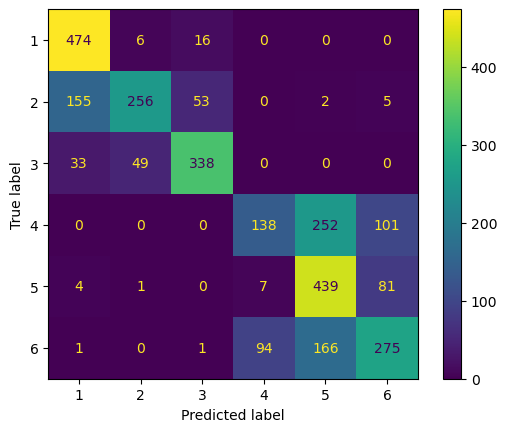

In [44]:
# Matriz de confusão da base de testes
print(f'Acurácia da melhor árvore na base de testes: {acuracia_teste2*100:.2f}')

ConfusionMatrixDisplay.from_estimator(clf2, X_test_top3_2, y_test)

In [45]:
y_pred = clf2.predict(X_test_top3_2)
cm = confusion_matrix(y_test, y_pred)
acertos = cm.diagonal()
erros = cm.sum(axis=0) - acertos
total = acertos + erros

avaliação = pd.DataFrame({
    'Classe': range(1, len(acertos) + 1),
    'Acertos': acertos, 
    'Erros': erros, 
    'Total' : total, 
    '%' : (acertos / (total)) * 100
})

avaliação['%'] = avaliação['%'].round(2)
avaliação.set_index('Classe', inplace=True)
avaliação

,Acertos,Erros,Total,%
Classe,,,,
1,474,193,667,71.06
2,256,56,312,82.05
3,338,70,408,82.84
4,138,101,239,57.74
5,439,420,859,51.11
6,275,187,462,59.52


### Insights:
- Ao avaliarmos a acurácia do modelo da questão 5 em comparação com a da questão 4, notamos uma queda de 71.33 para 65.15.
- Uma observação relevante é a mudança nas porcentagens de acertas das classes entre as duas questões. Nas três primeiras classes, o modelo da questão 5 obteve uma porcentagem de acertos maior do que o da questão 4. No entanto, as três últimas classes do modelo 5 tiveram uma queda drástica na porcentagem de acertos.